<a href="https://colab.research.google.com/github/nayane-d-souza/mineracao_preprocessing_stroke_prediction/blob/main/Mineracao__pre_processamento_stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [3]:
df = pd.read_csv ('/content/drive/MyDrive/mineração_de_dados/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

#Análise da distribuição dos dados

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'body mass index(BMI)')

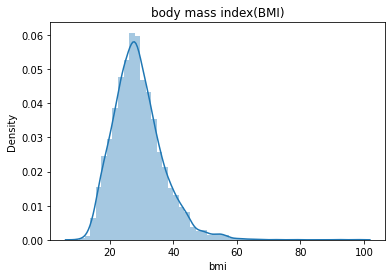

In [16]:
sns.distplot (df['bmi']).set_title('body mass index(BMI)')
#sns.boxplot(df['bmi']).set_title('body mass index (BMI)')

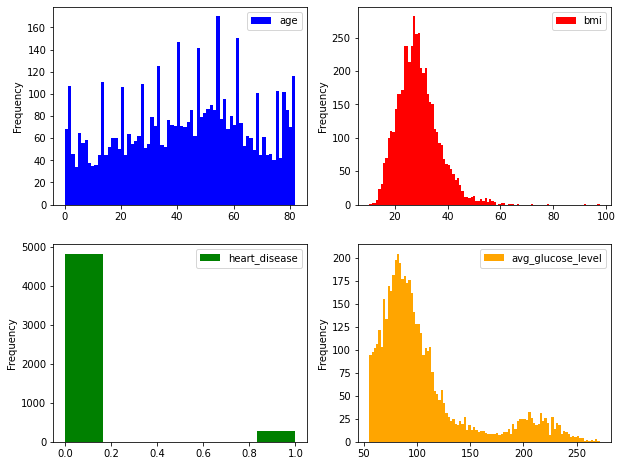

In [30]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize = (10,8))
df.plot(kind='hist', y='age', bins=70, color='b', ax=axes[0][0])#axis é a posição do gráfico na figura, para não sobrepor?
df.plot(kind='hist', y='bmi', bins=100, color='r', ax=axes[0][1]) #bins é o número de colunas?
df.plot(kind='hist', y='heart_disease', bins=6, color='g', ax=axes[1][0])
df.plot(kind='hist', y='avg_glucose_level', bins=100, color='orange', ax=axes[1][1])
#plt.show()

#RESUMO GERAL DA BASE DE DADOS

In [35]:
print('Linhas: ', df.shape[0])
print('Colunas: ', df.shape[1])
print('\nAtributos: \n', df.columns.tolist())
print('\nValores faltantes : ', df.isnull().sum().values.sum())
#se colocar só isnull aparece cada coluna com false e true
#ao cobinas isnull .sum, temos a soma por atributo de valores faltantes
#ao adicionar.values.sum() temos a soma total dos valores faltantes, sem especificar o atributo
print('\nValores únicos: \n', df.nunique())

Linhas:  5110
Colunas:  12

Atributos: 
 ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

Valores faltantes :  201

Valores únicos: 
 id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64


DATA VISUALIZATION

HEATMAP CORRELATION

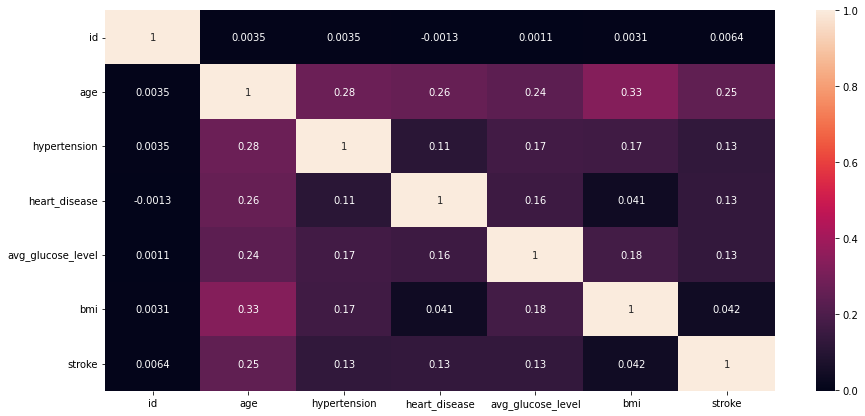

In [39]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)